# Chapter 1 - The Field

A field is a collection of values with a plus operation and a times operation


## Key concepts
- complex number, function overload, absolute value and conjugation of complex number
- transformation functions on complex number, adding, multiplying; 
- euler's formula and polar representation of complex number
- under polar representation, multiplying could be decomposed as rotation and scaling

In [1]:
# complex number
x = 1 + 3j
[
    1j,
    1+3j,
    (x - 1)**2,
    x.real,
    x.imag,
    type(x),
]

[1j, (1+3j), (-9+0j), 1.0, 3.0, complex]

In [2]:
# concept of overloading
def solve1(a,b,c): return (c-b)/a
solve1(10, 5, 30)
solve1(10+5j, 5, 20)

# for linear operations, the following contract is needed:
# - concepts and theorems are stated as +/-/*/%
# - operators have commutativity and distributivity

(1.2-0.6j)

## Playing with $\mathbb{C}$

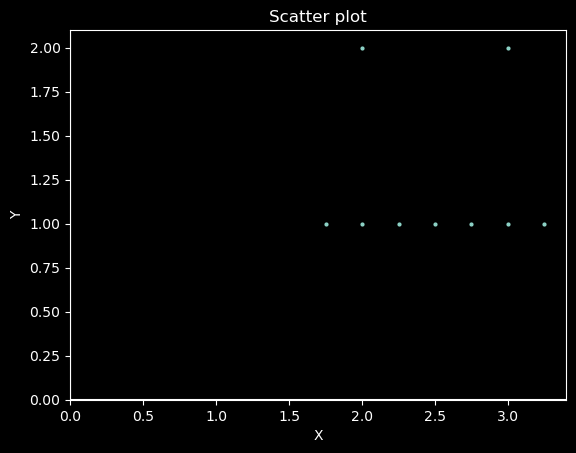

In [3]:
from plot import plot_points as plot
S = {2 + 2j, 3 + 2j, 1.75 + 1j, 2 + 1j, 2.25 + 1j, 2.5 + 1j, 2.75 + 1j, 3 + 1j, 3.25 + 1j}
plot(S, 4)

In [4]:
# Definition: The absolute value of a complex number z, written |z| is the distance from 
#             the origin to the corresponding point in the complex plane.
# Definition 1.4.2: The conjugate of a complex number z, written z̄, is defined as z.real−z.imag.
print([
        abs(x),
        (3+4j).conjugate(),
])

# Proposition: |z|^2 = z . z̄
assert abs(x * x) == x * x.conjugate()

[3.1622776601683795, (3-4j)]


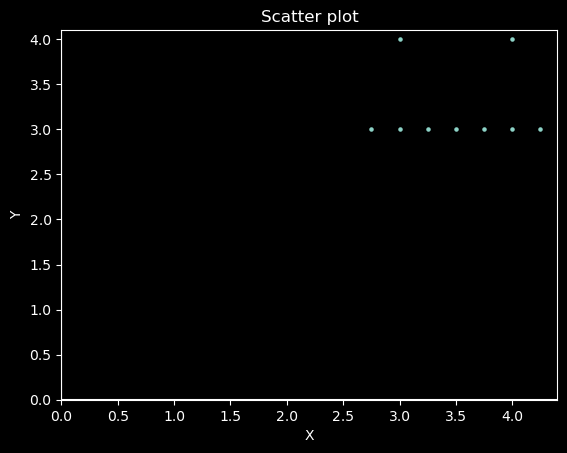

In [5]:
# Definition: translation is a function which transforms numbers in set with add. f(z) = z + z_0, inversible.
def translate(z, z0): return z + z0
plot({translate(z, 1+2j) for z in S})

In [6]:
# multiple by real number is scaling: f(z, a) = (a*z.real, a*z.imag)


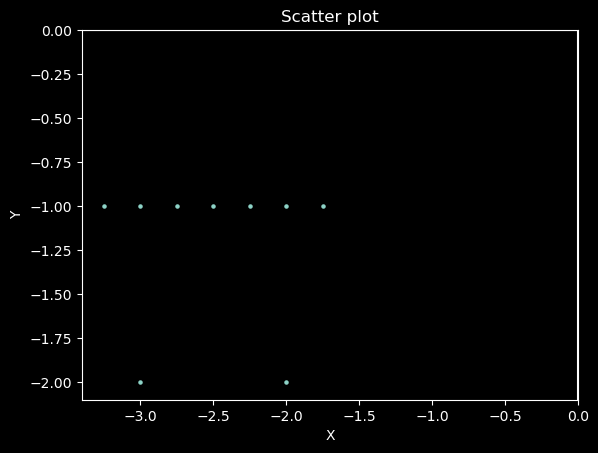

In [7]:
# multiple by -1, rotating 180 degress
plot({z * -1 for z in S})

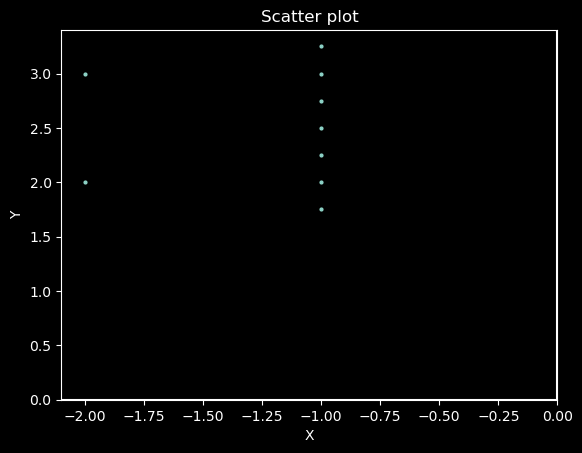

In [8]:
# multiple by i, rotating 90 degress
plot({z * 1j for z in S}, 4)

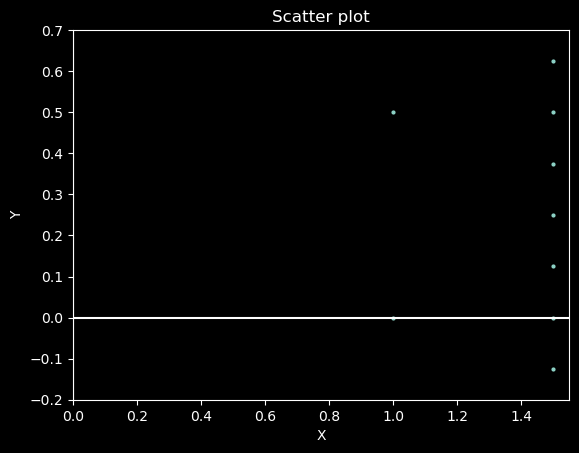

In [9]:
# Task 1.4.8
plot({translate(z * 0.5j, 2-1j) for z in S}, 4)

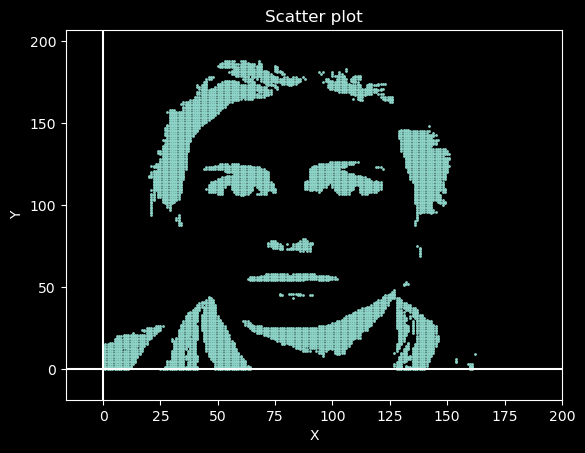

In [26]:
# Task 1.4.10
from book import image
data = image.file2image("./book/img01.png")
pts = [complex(x, y) 
       for y, row in enumerate(reversed(data)) # NOTE: reverse the y-axis and read rows
       for x, intensity in enumerate(row) if intensity[0] < 120]
plot({z for z in pts}, 1, 200, 200)

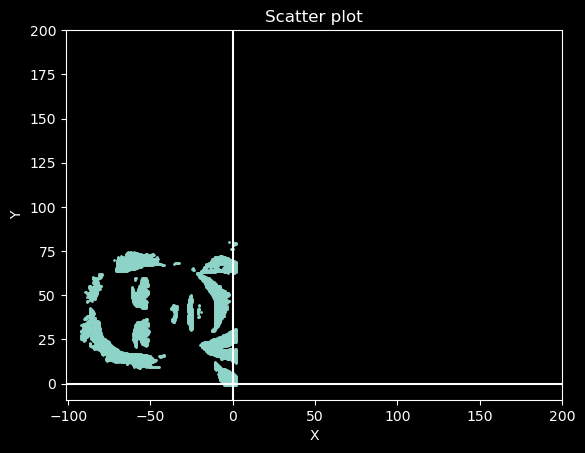

In [28]:
# Task 1.4.12
plot({z * 0.5j + 2-1j for z in pts}, 1, 200, 200)

In [12]:
# Remark 1.4.15: The argument of z is the angle formed by z with 1 + 0i.

# Definition: The angle is the line segments formed by the argument of z1 and z2

In [13]:
# Euler’s formula states that, for any real number θ, e**i·θ is the point z on the unit circle with argument θ.
# special case for (θ = pi) e**(i*pi) = -1

# Reference: Leonhard Euler

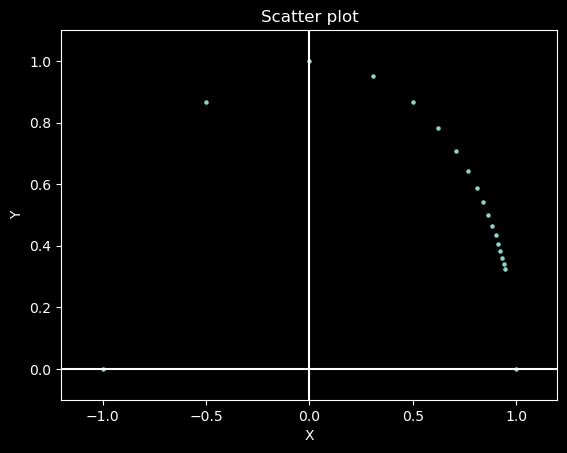

In [14]:
# Task 1.4.17
import math
plot({z for z in [math.e ** (2*math.pi*1j/n) for n in range(1, 20)]})

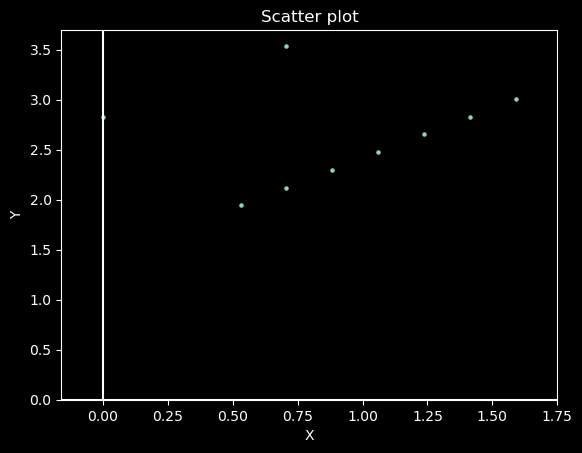

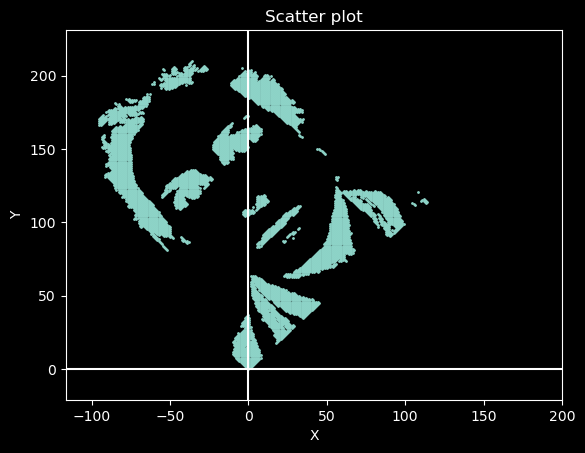

In [29]:
# Euler's formula offers a polar representation of complex number: z = r * e^(i·θ)
# - θ is the argument of z 
# - r is the absolute of z

# Rotation by τ
# f(z) = z*e^(τi)

def rotate(z, tau): return z*math.e**(tau * 1j) 

# Task 1.4.18
plot({rotate(z, math.pi/4) for z in S})

# Task 1.4.19
plot({rotate(z, math.pi/4) for z in pts}, 1, 200)

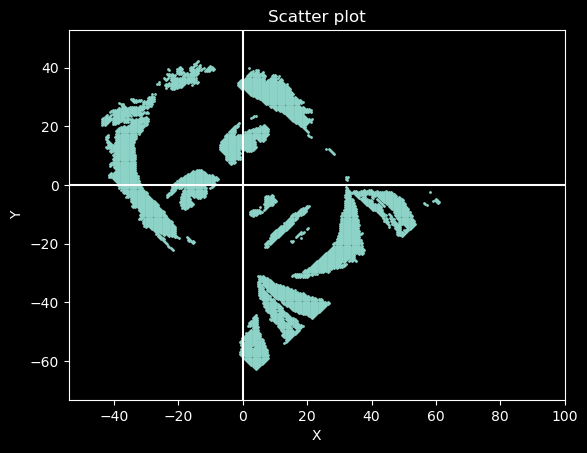

In [31]:
# Both scaling and rotation both consist in multiplication, a rotation and a scaling can be combined

# Task 1.4.20
h = len(data)
w = len(data[0])
plot({0.5 * rotate(translate(z,complex(-w/2, -h/2)), math.pi/4) for z in pts}, 1, 100)

# 1.5 Playing with GF (2)

## Reference
Galois is known for his work in the area of abstract algebra, particularly in the field of group theory.

In [17]:
from book.GF2 import one, zero
# Galois Field
[
    one*one,
    one*zero,
    one + zero,
    one+one,
    -one
]

[one, 0, one, 0, one]

In [18]:
# 1.5.1 Perfect secrecy revisited
# The previous system is k -> k + p GF(2)
# long message could be encrypted bit by bit, and each bit is independent, so remains perfect secrecy

# The system is called one-time pad.
# A one-time pad is a cryptographic technique that uses a random and secret key of the same length as the message being encrypted. 
# The key is used only once and then destroyed, hence the name "one-time" pad.
# Limitation: key distribution, key length needs to equal to message length

In [19]:
# Problem 1.5.1
import functools
char_map = {chr(i + 65): i for i in range(26)}
char_map_inv = {i: chr(i + 65) for i in range(26)}
bits_map = lambda n: format(n, "05b")
bits_map_inv = lambda s: int(s, 2)

def to_gf(digit): return {'1': one, '0': zero}[digit]
def from_gf(gf):  return {one: '1', zero: '0'}[gf]

def encrypt(key, s):
    return ''.join(from_gf(to_gf(ch) + to_gf(k))
         for ch, k in zip(list(s), key))
def decrypt(key, s):
    return ''.join(from_gf(to_gf(ch) - to_gf(k)) 
            for ch, k in zip(list(s), key))

# Example:
flawed_key = list('00110') * 11
flawed_encrypt = functools.partial(encrypt, flawed_key)
flawed_decrypt = functools.partial(decrypt, flawed_key)
[
    char_map_inv[bits_map_inv(
        flawed_decrypt(
            flawed_encrypt(bits_map(char_map[ch]))))
] for ch in "HELLOWORLDA"]

cyphertext = '10101 00100 10101 01011 11001 00011 01011 10101 00100 11001 11010'
# NOTE: Full search to find a valid key(s) which is consistant with functions domains
for i in range(32):
    key = list(format(i, "05b")) * 11
    attempted_decrypt = functools.partial(decrypt, key)
    if all(bits_map_inv(attempted_decrypt(ch)) in char_map_inv
           for ch in cyphertext.split(' ')):
        print(''.join(key))
        decrypted = [char_map_inv[
            bits_map_inv(attempted_decrypt(ch))
        ] for ch in cyphertext.split(' ')]
        print(''.join(decrypted))
        assert cyphertext == ' '.join(encrypt(key, bits_map(char_map[ch])) for ch in decrypted)
        print()

0110001100011000110001100011000110001100011000110001100
ZIZHVPHZIVW

0110101101011010110101101011010110101101011010110101101
YJYGUOGYJUX

1001010010100101001010010100101001010010100101001010010
HWHZLRZHWLI

1001110011100111001110011100111001110011100111001110011
GXGYKQYGXKJ



In [20]:
# Network coding using GF(2)
# Powerful application to double the bandwidth

In [21]:
# Problem 1.7.12
def transform(a, b, L):
    return [a * z + b for z in L]

# (z + (1 + 1j)) * -1j)*2, up 1, right 1, clock-wise 90, scale by 2
# 2 * (b + 1) - 2 * (a + 1) * i